# Trabajo práctico integrador

**Nombre**: Erik Hromek

## Primera Parte (Clase 1 y 2)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [11]:
# Aplicando definición de normal del vector
def calculate_norm_vector(matrix: np.ndarray, ord: str) -> np.ndarray:
    if ord == "0":
        # Calcular l_0: suma de items distintos de cero de un vector
        return np.sum(np.absolute(matrix), axis=1)
    elif ord == "inf":
        # Calcular l_inf: seleccionar el item cuyo modulo es mayor
        return np.max(np.absolute(matrix), axis=1)
    else:
        # Calcular l_1 o l_2: calcular la distancia de las columnas 
        return np.sum(np.absolute(matrix) ** int(ord) , axis=1) ** (1/int(ord))


# Siguiendo la definición de norma matricial
def calculate_norm(matrix: np.ndarray, ord: str) -> int:
    if ord == "0":
        # Calcular l_0: suma de items distintos de cero
        curr_sum = 0
        for i in matrix:
            for j in i:
                if j != 0:
                    curr_sum = curr_sum + j
        return curr_sum    
    elif ord == "inf":
        # Calcular l_inf: seleccionar el item cuyo modulo es mayor
        curr_max = 0
        for i in matrix:
            curr_sum = 0
            for j in i:
                curr_sum = curr_sum + abs(j)
            if curr_sum > curr_max:
                curr_max = curr_sum
        return curr_max
    else:
        # Calcular l_1 o l_2: calcular la distancia de las columnas (itero la transpuesta para que sea más simple)
        cumulative_sum = 0
        for i in matrix.T:
            curr_sum = 0
            for j in i:
                curr_sum = curr_sum +  abs(j) ** int(ord)
            cumulative_sum = cumulative_sum + curr_sum
        return cumulative_sum ** (1/int(ord))

a = np.arange(9) - 4
b = a.reshape((3,3))
print(b)
print(calculate_norm(b, "0"))
print(calculate_norm(b, "1"))
print(calculate_norm(b, "2"))
print(calculate_norm(b, "inf"))

print(calculate_norm_vector(b, "2"))

[[-4 -3 -2]
 [-1  0  1]
 [ 2  3  4]]
0
20.0
7.745966692414834
9
[5.38516481 1.41421356 5.38516481]


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [17]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

def get_TP(a: np.ndarray, b: np.ndarray) -> int:
    # Le hago un AND lógico para quedarme con los 1, y luego los cuento
    arr = np.logical_and(a,b)
    return np.count_nonzero(arr)

def get_TN(a: np.ndarray, b: np.ndarray) -> int:
    # Le hago un OR lógico para obtener los 1 (solamente me dan 0 si tengo truth = 0 y prediction=0) y luego los invierto!
    arr = np.logical_or(a,b)
    return np.count_nonzero(np.invert(arr))

def get_FP(a: np.ndarray, b: np.ndarray) -> int:
    # Le hago un XOR, y luego al resultado le hago un AND con la predicción, para quedarme con los valores donde prediction=1
    arr = np.logical_xor(a,b)
    arr = np.logical_and(arr,b)
    return np.count_nonzero(arr)

def get_FN(a: np.ndarray, b: np.ndarray) -> int:
    # Le hago un XOR, y luego al resultado le hago un AND con la predicción, para quedarme con los valores donde truth=1
    arr = np.logical_xor(a,b)
    arr = np.logical_and(arr,a)
    return np.count_nonzero(arr)

TP = get_TP(truth, prediction)
TN = get_TN(truth, prediction)
FP = get_FP(truth, prediction)
FN = get_FN(truth, prediction)

print(TP / (TP + FP))
print(TP / (TP + FN))
print((TP + TN) / (TP + TN + FP + FN))



0.5
0.5
0.4


### Tercer y Cuarto Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 3) y $k=10$ (ej 4). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

(7352, 561)
(7352, 26)


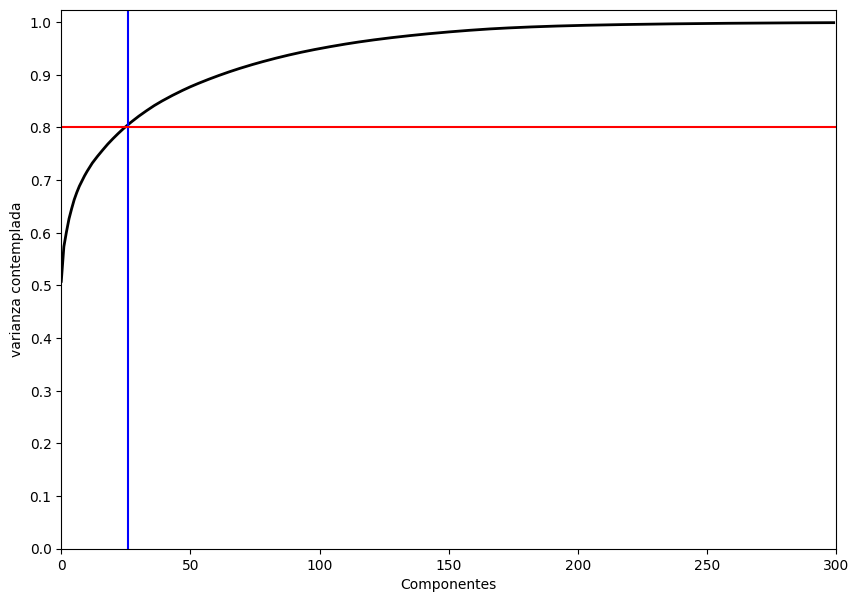

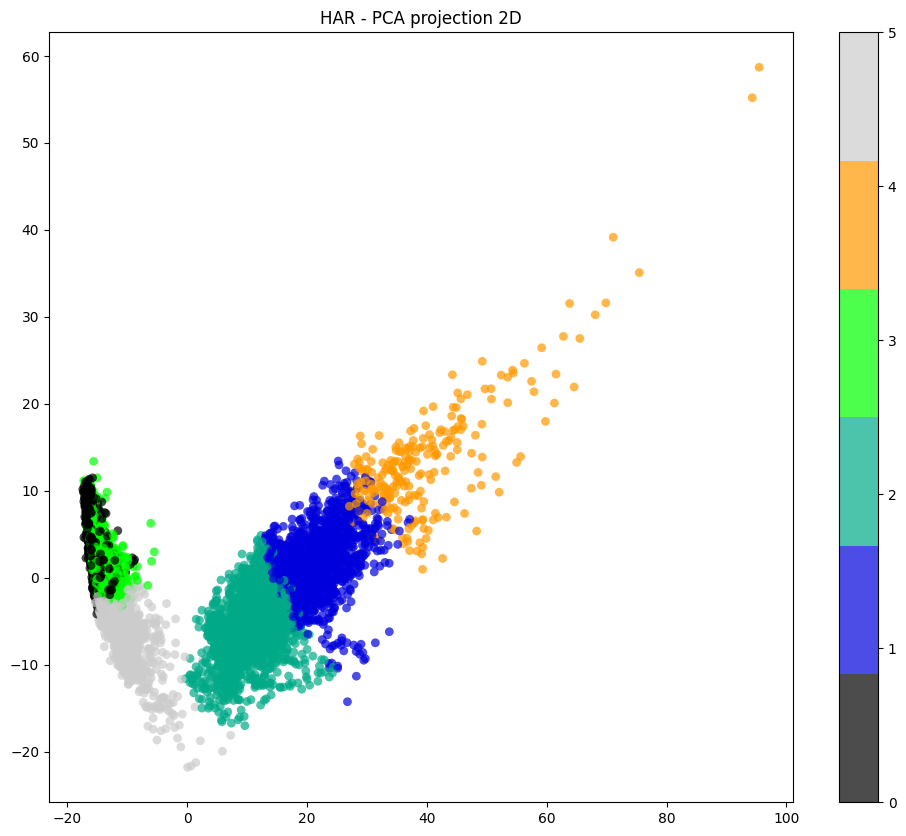

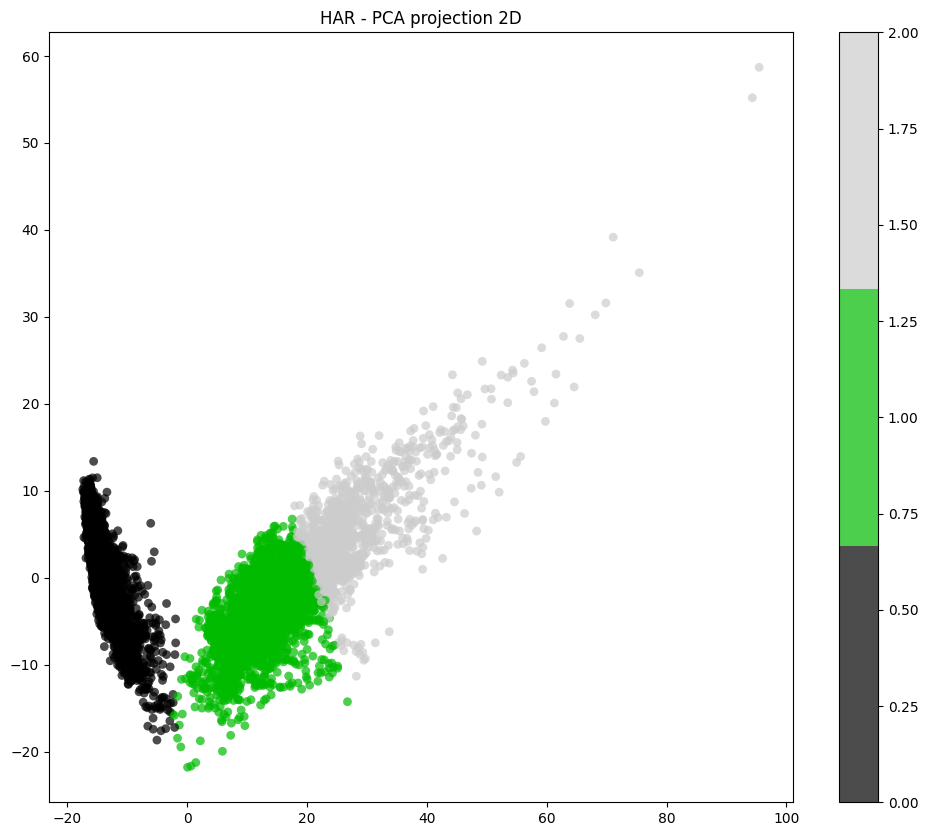

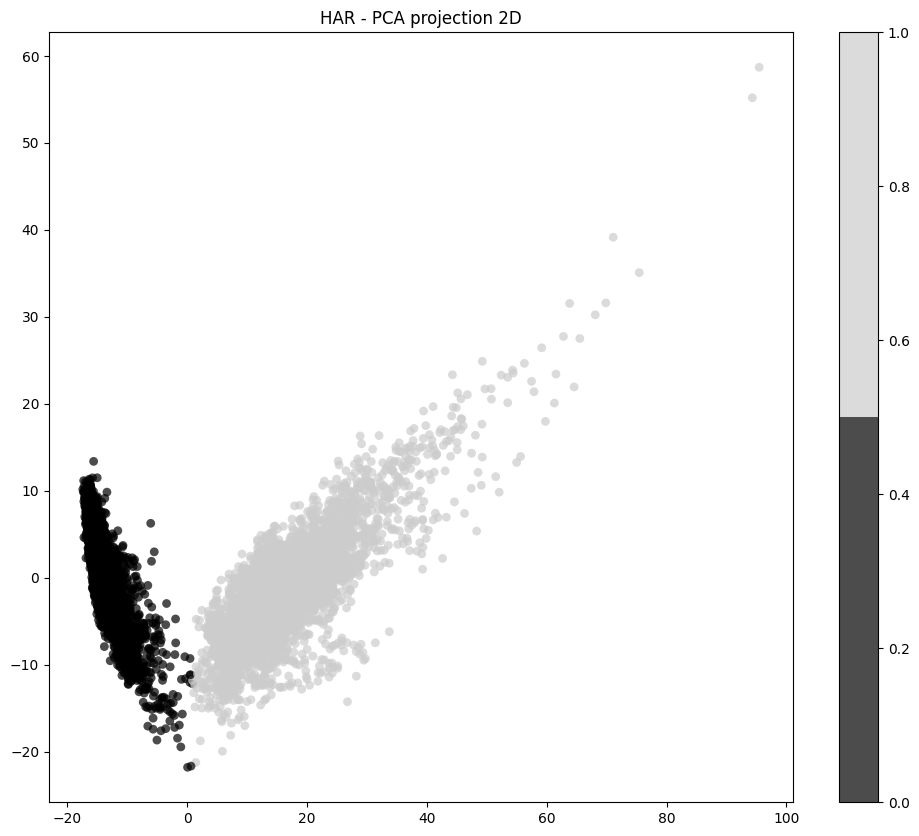

In [4]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Dataset HAR
# No lo subo al repositorio por el peso que ocupa
X_tr = np.loadtxt("data/HAR_Dataset/train/X_train.txt")
y_tr = np.loadtxt("data/HAR_Dataset/train/y_train.txt").astype(int)


# Cantidad de variables por entrada para dataset 1 (HAR)
print(X_tr.shape) # 561

# Estandarizamos
scaler = StandardScaler() # clase para estandarizar removiendo la media
X_scaled = scaler.fit_transform(X_tr)

# Aplicamos PCA
# Resulta un poco engorroso ver gráficamente como se relacionan las variables (hay más de 500), entonces planteamos reducir
# La cantidad de dimensiones pero conservando la mayor varianza entre ellas

# Indicamos que queremos al menos conservar la cantidad de features tal que tengamos el 80% de la varianza contemplada
pca = PCA(n_components=0.8).fit(X_scaled)

# Esto debe devolvernos una matriz con la misma cantidad de filas que la X_tr, pero con menor columnas (features o variables)
X_pca = pca.transform(X_scaled)

print(X_pca.shape) # Nos da 26

# Grafiquemos usando explained_variance_ratio como sube la varianza contemplada a medida que voy sumando componentes
# Voy a armar nuevamente PCA pero pidiendo poner más componentes (ya los componentes posterior al 150 casi no suman)

pca_graph = PCA(n_components=300).fit(X_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_graph.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Componentes')
plt.ylabel('varianza contemplada')
plt.xlim(0, 300)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b')
plt.axhline(0.8, c='r')
plt.show();

# Voy a usar KMean para clusterizar, usando 6 grupos, 100 es la cantidad de veces que va a correr el algortimo usando diferentes puntos de partida
kmeans = KMeans(n_clusters=6, n_init=100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
# Graficamos los componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 6))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

# Voy a usar KMean de nuevo, usando 3 grupos
kmeans = KMeans(n_clusters=3, n_init=100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
# Graficamos los componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 3))
plt.rcParams['axes.grid'] = False
plt.colorbar()

# En este caso, tiene más sentido el resultado, ya que está mejor "clusterizado" o agrupado, todas maneras para los clusters de la derecha, resulta dificil donde cae un punto arbitrario
plt.title('HAR - PCA projection 2D');

# Por último, podemos probar tratando de dividir en 2 clusters

# KMean de nuevo, indicando 2 clusters
kmeans = KMeans(n_clusters=2, n_init=100)
kmeans.fit(X_pca)
cluster_labels = kmeans.labels_
# Graficamos los componentes - clusters id
plt.figure(figsize=(12,10)) 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

# En relación al uso de PCA antes de KMeans, entendemos que permite:
# 1) reducir la complejidad computacional
# 2) eliminar componentes que no aportan mucho a la composición de los datos -> ayuda por lo tanto a la "visualización" o comprensión de la naturaleza del problema

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]
(1797, 21)


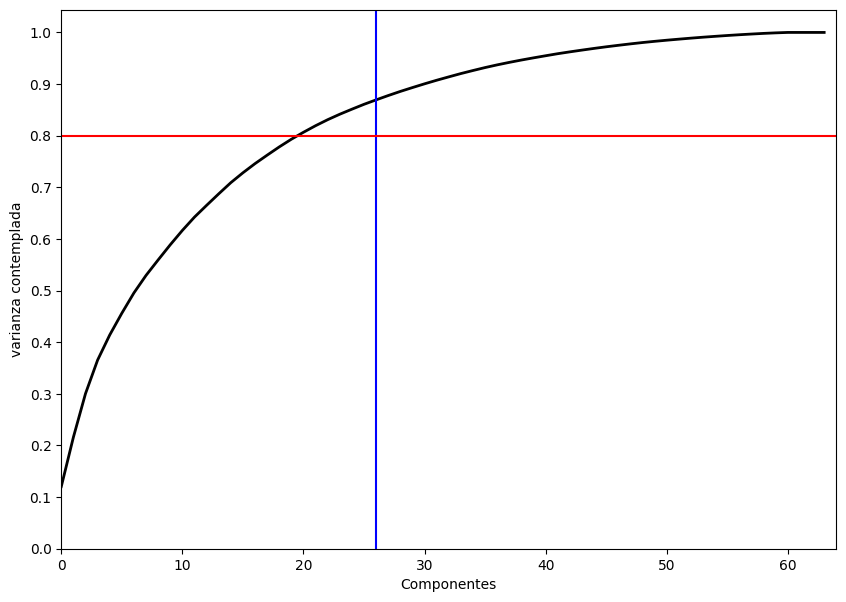

Donde cae cada dígito


,cluster 0,cluster 1,cluster 2,cluster 3,cluster 4,cluster 5,cluster 6,cluster 7,cluster 8,cluster 9,Todos
0,177,0,0,0,0,0,0,0,1,0,178
1,0,96,58,1,27,0,0,0,0,0,182
2,0,31,7,2,50,0,0,4,0,83,177
3,0,10,0,7,2,0,0,151,0,13,183
4,0,4,7,4,0,9,0,0,157,0,181
5,0,62,2,2,0,0,3,69,2,42,182
6,1,6,1,0,0,0,173,0,0,0,181
7,0,0,3,150,0,18,0,0,0,8,179
8,0,94,20,3,0,0,1,47,0,9,174
9,0,5,19,8,0,3,0,145,0,0,180


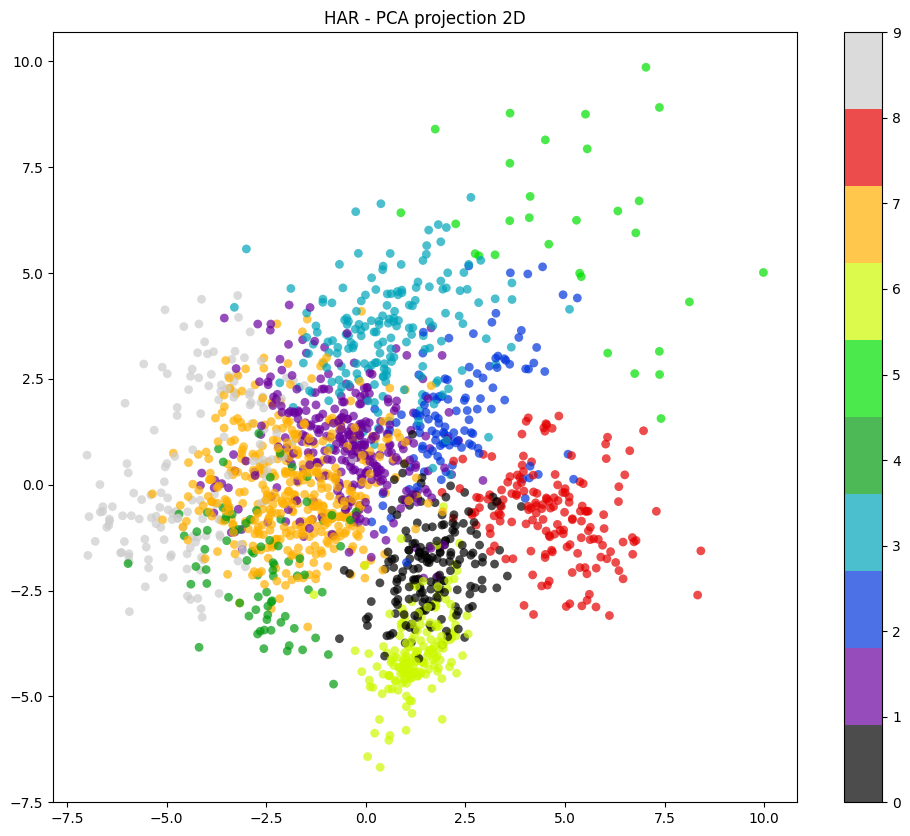

In [8]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Dataset MNIST
from sklearn.datasets import load_digits

%matplotlib inline
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

# Dataset MNIST, lo incluye la biblioteca de sklearn
X_tr2, y_tr2 = load_digits(return_X_y=True)

# Cantidad de variables por entrada para dataset 2 (MNIST)
print(X_tr2.shape)

# Valores de salida (deben ser 10 dígitos)
print(np.unique(y_tr2))

# Estandarizamos
scaler = StandardScaler() # clase para estandarizar removiendo la media
X2_scaled = scaler.fit_transform(X_tr2)

# Aplicamos PCA

# Indicamos que queremos al menos conservar la cantidad de features tal que tengamos el 80% de la varianza contemplada
pca2 = PCA(n_components=0.8).fit(X2_scaled)

X_pca2 = pca2.transform(X2_scaled)

print(X_pca2.shape) # 21 -> me indica que con 21 pixeles de los 64 originales, explico el 80% de la varianza

pca_graph = PCA(n_components=64).fit(X2_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca_graph.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Componentes')
plt.ylabel('varianza contemplada')
plt.xlim(0, 64)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(26, c='b')
plt.axhline(0.8, c='r')
plt.show();


# Voy a usar KMean para clusterizar con k=10 y ver que resultado se obtiene
kmeans = KMeans(n_clusters=10, n_init=100)
kmeans.fit(X_pca2)
cluster_labels = kmeans.labels_
# Graficamos los componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

# Podemos ver donde cae cada dígito (vemos que algunos números están bien diferencias, pero otros resulta muy complicado determinar donde caen)
print("Donde cae cada dígito")
tab = pd.crosstab(y_tr2, cluster_labels, margins=True)
tab.index = ['0', '1', '2', '3', '4','5','6','7','8','9', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['Todos']
tab



,cluster 0,cluster 1,Todos
0,178,0,178
1,3,179,182
2,1,176,177
3,3,180,183
4,176,5,181
5,13,169,182
6,180,1,181
7,12,167,179
8,5,169,174
9,9,171,180


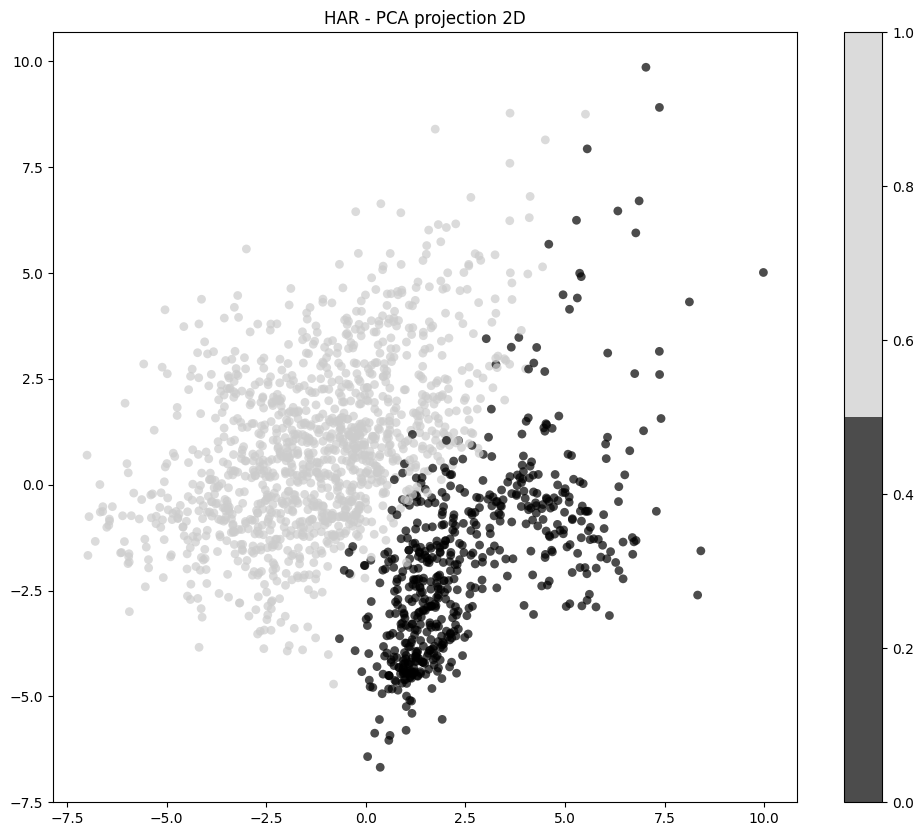

In [7]:
# Los clusters están ligeramente agrupados, pero hay puntos donde es muy complicado determinar qué dígito son, será esto por la cantidad de pixeles?
# Podemos probar hacerlo de nuevo con k=2

kmeans = KMeans(n_clusters=2, n_init=100)
kmeans.fit(X_pca2)
cluster_labels = kmeans.labels_
# Graficamos los componentes - clusters id
plt.figure(figsize=(12,10))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('HAR - PCA projection 2D');

# Si bien la clusterización tiene un poco más de sentido, de todas maneras no ayuda a entender la naturaleza del problema

# Podemos ver como cae cada dígito dentro de los clusters

cluster_labels_mov = kmeans.labels_
tab = pd.crosstab(y_tr2, cluster_labels_mov, margins=True)
tab.index = ['0', '1', '2', '3', '4','5','6','7','8','9', 'Todos']
tab.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['Todos']
tab

# No resulta útil la agrupación, ya que aprori no encontramos relación de porqué un dígito cae en uno u otro
# Propuestas: revisar si con más clusteres, podemos detectar características de los dígitos que permitan identificarlos, y construir un método que ayude a comprobar y predecir dígitos


## Segunda Parte (Clase 3 y 4)

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

Vamos a crear un dataset sintetico utilizando las librerias de [Sklearn Datasets](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html), en particular nos interesa crear un problema de regresion
lineal al que podemos variarle sus parametros

In [10]:
# Creamos un dataset de prueba
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)
new_data.shape

(1000, 2)

In [11]:
df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col

df.head()

,feature_1,target
0,-1.758739,-30.118736
1,1.031845,14.526197
2,-0.487606,-10.119305
3,0.186454,1.700188
4,0.725767,12.345314


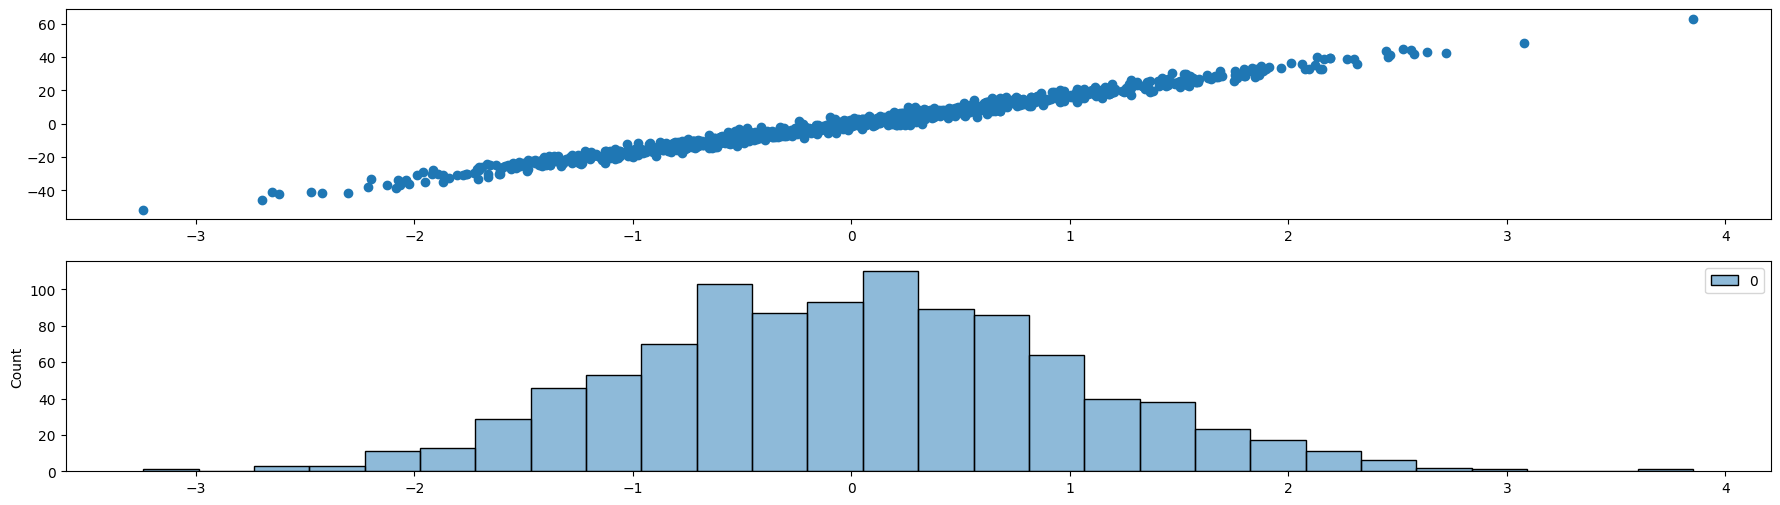

In [12]:
fig,axes = plt.subplots(2,figsize=(22,6))
axes[0].scatter(X,y)
sns.histplot(X, ax=axes[1]);

### Funciones auxiliares para generar datos anómalos

In [30]:
def generate_outliers(df: pd.DataFrame,
                     cols: list = None,
                     extreme_outlier: bool = False,
                     two_tailed: bool = False,
                     percentage: float = 0.02) -> pd.DataFrame:
  """Con esta función vamos a poder generar outliers en ciertas columnas de nuestro
  dataset. Si le damos True a _extreme_outlier_ va a generar outliers con mucho
  peso en la regresión (puede ser bilateral o unilateral segun _two_tailed_)
  """  
  seeds = np.random.randint(100, size = len(df))
  
  nsamples = np.math.floor(len(df) * percentage)
  idx_to_change = df.sample(n = nsamples).index

  cols = df.columns.tolist() if cols is None else cols

  result = df.copy(deep = True)
  
  for i,col_name in enumerate(cols):
    np.random.seed(seeds[i])

    iqr = result[col_name].quantile(0.75) - result[col_name].quantile(0.25)

    lb = result[col_name].quantile(0.25) - 1 * iqr
    ub = result[col_name].quantile(0.75) + 1 * iqr

    if two_tailed:
      outs = result[col_name].loc[(result[col_name] < lb) | (result[col_name] > ub)]
    else:
      outs = result[col_name].loc[(result[col_name] > ub)]
    
    out_size = len(outs)
    if out_size < nsamples:
      nsamples = out_size

    idx_to_change = outs.sample(nsamples, replace = False).index
    
    if extreme_outlier:
      outlier_sign = [1 if np.random.random() < 0.9 else -1 for _ in range(nsamples)]
      
      result[col_name].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result[col_name].mean(),
                                                                          high = result[col_name].max()*5,
                                                                          size = nsamples)
                                                        )
      result['target'].loc[idx_to_change] = np.multiply(outlier_sign,
                                                        np.random.uniform(low = result['target'].mean(),
                                                                          high = result['target'].max()*2,
                                                                          size = nsamples)
                                                        )
    else:
      samples = result[col_name].loc[idx_to_change].values
      np.random.shuffle(samples)
      result[col_name].loc[idx_to_change] = samples
  
  return result

In [14]:
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = True, two_tailed= True)

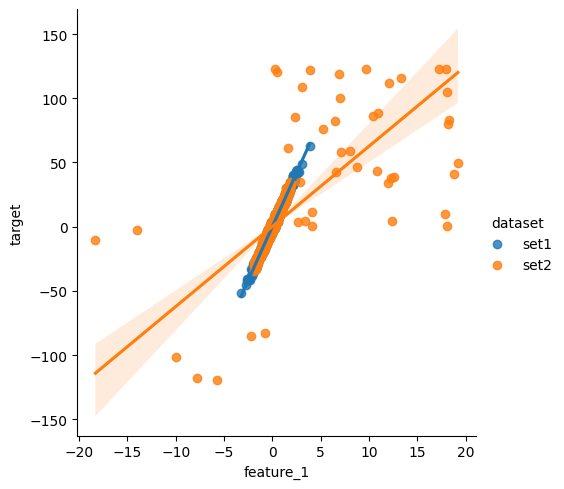

In [15]:
sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')


### Quinto ejercicio

Crear una función que separe los datos en train-validation-test 70-20-10


Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [32]:
def split(df: pd.DataFrame, train_size: float):
    # Vamos a trabajar partiendo el dataset en 70-20-10 para no hacer dinámico todavía
    # Podría recibir también por parámetro el test_size

    size = df[0].size

    # Vamos a mezclar todo el dataset, para que al cortar, no me queden "diferencias" entre los slices
    # Hay una función de numpy llamada shuffle, que hace el proceso de mezclar,
    # igual podemos hacerlo con un for X intentos (donde X sea > 0 y < df.size)
    # agarrar el item de una posición random Y y swapearlo con el item de otra posición random Z

    np.random.shuffle(df)

    tr_size = int(size * 0.7)
    tst_size = int(size * 0.9)

    train = df[0:tr_size]
    test = df[tr_size:tst_size]
    validate = df[tst_size:]

    # Suponemos que la última columna es el target
    # Esto significa que de los slices del dataset, me quedo con todas las filas, pero NO selecciono la última columna (features)
    X_train = train[:,:-1]
    X_val = validate[:,:-1]
    X_test = test[:,:-1]

    # Me quedo con todas las filas, pero solamente la última columna
    Y_train = train[:,-1]
    Y_val = validate[:,-1]
    Y_test = test[:,-1]

    return X_train, X_val, X_test, Y_train, Y_val, Y_test

# Vamos a hacer una matriz de 10x10
random_arr = np.random.rand(10,10)
X_train, X_val, X_test, Y_train, Y_val, Y_test = split(random_arr,0.7)
print(X_train.shape) # Debe ser una matriz de 7 filas (70%) con 9 columnas
print(X_train.shape) # Debe ser una matriz de 2 filas (20%) con 9 columnas
print(X_val.shape) # Debe ser una matriz de 1 filas (10%) con 9 columnas

print(Y_train.shape) # Debe ser una lista con 7 valores
print(Y_test.shape) # Debe ser una lista con 2 valores
print(Y_val.shape) # Debe ser una lista con 1 valor


(7, 9)
(7, 9)
(1, 9)
(7,)
(2,)
(1,)
[0.86927654 0.23827259]


### Sexto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Vemos lo que ocurre con 0.01
Vemos lo que ocurre con 0.02
Vemos lo que ocurre con 0.03
Vemos lo que ocurre con 0.05
Vemos lo que ocurre con 0.1


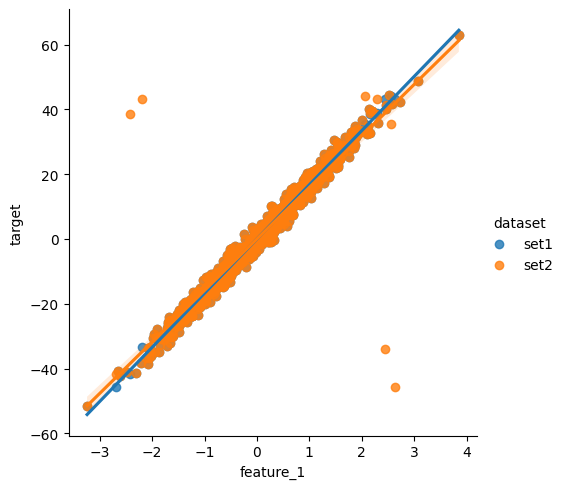

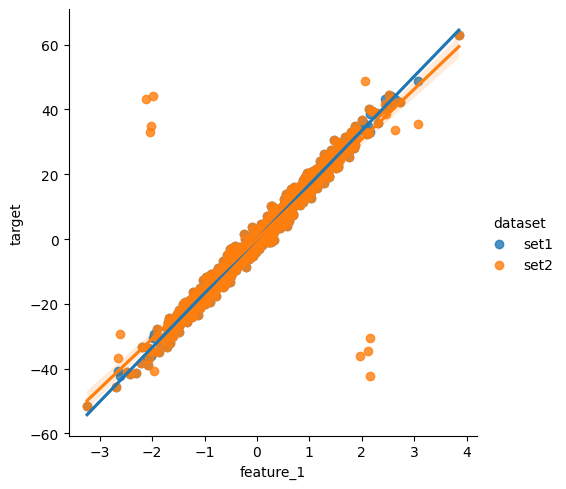

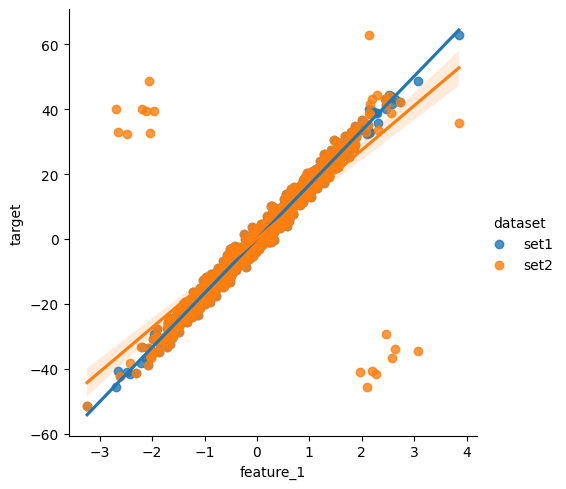

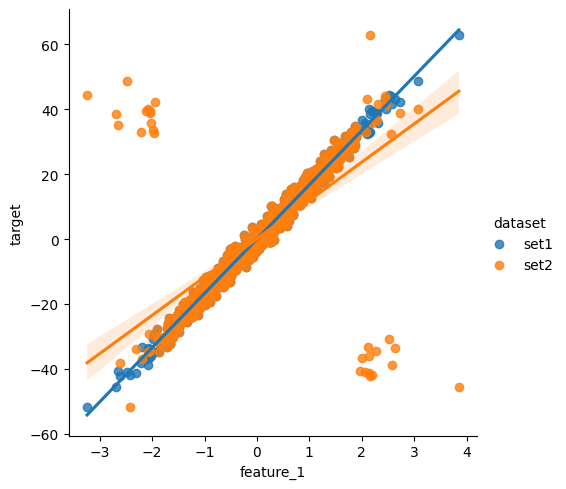

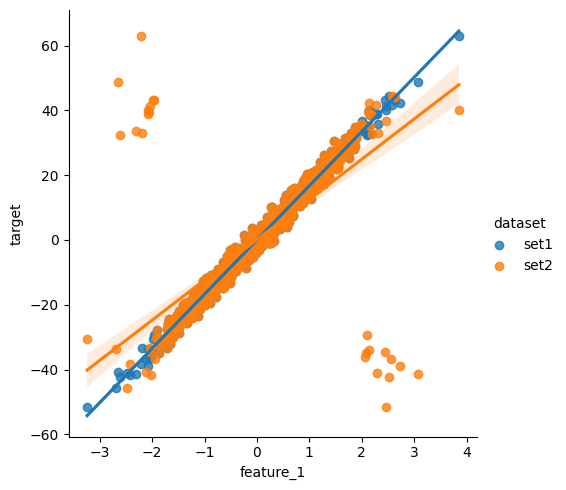

In [45]:
# Creamos dataset
X, y = make_regression(n_samples = 1000,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data = np.append(X,y.reshape(-1,1),axis=1)

df = pd.DataFrame(new_data)

new_col = []
i = 0
for col in df.columns:
    if i ==  len(df.columns) - 1:
        new_col.append("target")
    else :
        new_col.append("feature_" + str(i+1))
        
    i += 1
    
df.columns = new_col



print("Vemos lo que ocurre con 0.01")
df_outlier = generate_outliers(df,['feature_1'], percentage = 0.01, extreme_outlier = False, two_tailed= True)

sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

print("Vemos lo que ocurre con 0.02")
df_outlier1 = generate_outliers(df,['feature_1'], percentage = 0.02, extreme_outlier = False, two_tailed= True)

sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier1.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

print("Vemos lo que ocurre con 0.03")
df_outlier2 = generate_outliers(df,['feature_1'], percentage = 0.03, extreme_outlier = False, two_tailed= True)

sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier2.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

print("Vemos lo que ocurre con 0.05")
df_outlier3 = generate_outliers(df,['feature_1'], percentage = 0.05, extreme_outlier = False, two_tailed= True)

sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier3.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

print("Vemos lo que ocurre con 0.1")
df_outlier4 = generate_outliers(df,['feature_1'], percentage = 0.1, extreme_outlier = False, two_tailed= True)

sns.lmplot(data = pd.concat([df.assign(dataset = 'set1'),
                                 df_outlier4.assign(dataset = 'set2')]),
                x = 'feature_1',
                y = 'target',
                hue = 'dataset')

# Se observa que a partir del tercer gráfico, ya se empieza a desprender ver afectada la regresión en 
# comparación del original, y si vemos a partir del 4to gráfico, ya es bastante la diferencia entre una recta y otra


## Tercera Parte (Clase 5, 6 y 7)

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`